In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

Overview of the initial data`

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Understanding each column

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Renaming columns for better understanding.

In [5]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

In [6]:
df = df.rename(columns = rename_col)
df.head(5)

listing_id                                      listing_name  host_id  \
0        2539                Clean & quiet apt home by the park     2787   
1        2595                             Skylit Midtown Castle     2845   
2        3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3        3831                   Cozy Entire Floor of Brownstone     4869   
4        5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  total_reviews last_review  \
0     Private room    149               1              9  2018-10-19   
1  Entire home/apt    225               1             45  2019-05-21   
2     Private room    150               3              0         NaN   
3  Entire home/apt     89               1            270  2019-07-05   
4  Entire home/apt     80              10              9  2018-11-19   

   reviews_per_month  host_listings_count  availability_365  
0               0.21                    6               365  
1               0.38                    2               355  
2                NaN                    1               365  
3               4.64                    1               194  
4               0.10                    1                 0

In [7]:
df.shape

(48895, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [9]:
#Checking duplicate rows in dataset
df = df.drop_duplicates()
df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [10]:
# Checking for null values in each of the columns
df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [11]:
rows_with_null_listing_name = df[df['last_review'].isnull()]

rows_with_null_listing_name


listing_id                                       listing_name  \
2            3647                THE VILLAGE OF HARLEM....NEW YORK !   
19           7750                  Huge 2 BR Upper East  Cental Park   
26           8700  Magnifique Suite au N de Manhattan - vue Cloitres   
36          11452                        Clean and Quiet in Brooklyn   
38          11943                          Country space in the city   
...           ...                                                ...   
48890    36484665    Charming one bedroom - newly renovated rowhouse   
48891    36485057      Affordable room in Bushwick/East Williamsburg   
48892    36485431            Sunny Studio at Historical Neighborhood   
48893    36485609               43rd St. Time Square-cozy single bed   
48894    36487245  Trendy duplex in the very heart of Hell's Kitchen   

        host_id        host_name neighbourhood_group       neighbourhood  \
2          4632        Elisabeth           Manhattan              Harlem   
19        17985             Sing           Manhattan         East Harlem   
26        26394  Claude & Sophie           Manhattan              Inwood   
36         7355               Vt            Brooklyn  Bedford-Stuyvesant   
38        45445          Harriet            Brooklyn            Flatbush   
...         ...              ...                 ...                 ...   
48890   8232441          Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630          Marisol            Brooklyn            Bushwick   
48892  23492952    Ilgar & Aysel           Manhattan              Harlem   
48893  30985759              Taz           Manhattan      Hell's Kitchen   
48894  68119814       Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
2      40.80902  -73.94190     Private room    150               3   
19     40.79685  -73.94872  Entire home/apt    190               7   
26     40.86754  -73.92639     Private room     80               4   
36     40.68876  -73.94312     Private room     35              60   
38     40.63702  -73.96327     Private room    150               1   
...         ...        ...              ...    ...             ...   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48893  40.75751  -73.99112      Shared room     55               1   
48894  40.76404  -73.98933     Private room     90               7   

       total_reviews last_review  reviews_per_month  host_listings_count  \
2                  0         NaN                NaN                    1   
19                 0         NaN                NaN                    2   
26                 0         NaN                NaN                    1   
36                 0         NaN                NaN                    1   
38                 0         NaN                NaN                    1   
...              ...         ...                ...                  ...   
48890              0         NaN                NaN                    2   
48891              0         NaN                NaN                    2   
48892              0         NaN                NaN                    1   
48893              0         NaN                NaN                    6   
48894              0         NaN                NaN                    1   

       availability_365  
2                   365  
19                  249  
26                    0  
36                  365  
38                  365  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[10052 rows x 16 columns]

In [12]:
df['listing_name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [13]:
df.isnull().sum()

listing_id                 0
listing_name               0
host_id                    0
host_name                  0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [14]:
df = df.drop(['last_review'], axis=1)
df = df.drop(['availability_365'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


In [16]:
df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [17]:
#same owner and host
df[df['listing_name']==df['host_name']].head()

listing_id    listing_name    host_id       host_name  \
9473      7264659         Olivier    6994503         Olivier   
10682     8212051           Monty   43302952           Monty   
16422    13186374            Sean   35143476            Sean   
23996    19348168             Cyn   74033595             Cyn   
24152    19456810  Hillside Hotel  134184451  Hillside Hotel   

      neighbourhood_group       neighbourhood  latitude  longitude  \
9473            Manhattan     Upper West Side  40.78931  -73.97520   
10682            Brooklyn       East Flatbush  40.66383  -73.92706   
16422            Brooklyn     Windsor Terrace  40.65182  -73.98043   
23996            Brooklyn  Bedford-Stuyvesant  40.67850  -73.91478   
24152              Queens           Briarwood  40.70454  -73.81549   

             room_type  price  minimum_nights  total_reviews  \
9473   Entire home/apt    200               5             12   
10682      Shared room     95               2              7   
16422  Entire home/apt    400               7              0   
23996     Private room     75               2              1   
24152     Private room     93               1              2   

       reviews_per_month  host_listings_count  
9473                   0                    1  
10682                  0                    1  
16422                  0                    1  
23996                  0                    1  
24152                  0                   18

In [18]:
#different owner and host
df[df['listing_name']!=df['host_name']].head()

listing_id                                      listing_name  host_id  \
0        2539                Clean & quiet apt home by the park     2787   
1        2595                             Skylit Midtown Castle     2845   
2        3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3        3831                   Cozy Entire Floor of Brownstone     4869   
4        5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  total_reviews  reviews_per_month  \
0     Private room    149               1              9                  0   
1  Entire home/apt    225               1             45                  0   
2     Private room    150               3              0                  0   
3  Entire home/apt     89               1            270                  4   
4  Entire home/apt     80              10              9                  0   

   host_listings_count  
0                    6  
1                    2  
2                    1  
3                    1  
4                    1

In [19]:
df.describe()

listing_id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  total_reviews  reviews_per_month  host_listings_count  
count    48895.000000   48895.000000       48895.000000         48895.000000  
mean         7.029962      23.274466           0.806258             7.143982  
std         20.510550      44.550582           1.502767            32.952519  
min          1.000000       0.000000           0.000000             1.000000  
25%          1.000000       1.000000           0.000000             1.000000  
50%          3.000000       5.000000           0.000000             1.000000  
75%          5.000000      24.000000           1.000000             2.000000  
max       1250.000000     629.000000          58.000000           327.000000

In [20]:
import matplotlib.pyplot as plt    
%matplotlib inline
import seaborn as sns   
import plotly.express as px 

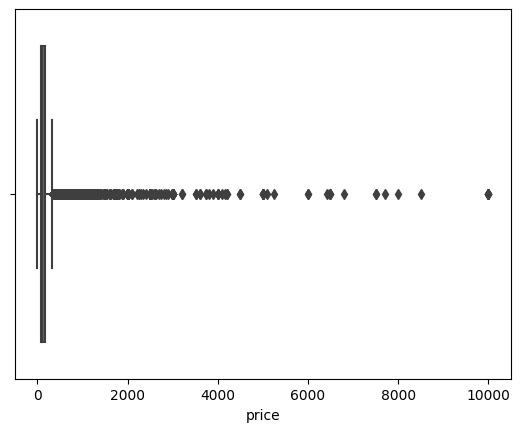

In [21]:
sns.boxplot(x = df['price'])

plt.show()

(45918, 14)


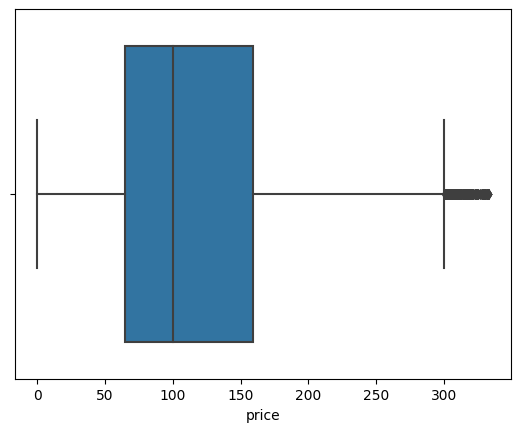

In [22]:
# Writing an outlier function for removing outliers in the important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range, upper_range

lower_bound, upper_bound = iqr_technique(df['price'])

df = df[(df.price>lower_bound) & (df.price<upper_bound)]

# So the outliers from price column are removed and now we can check the boxplot as well as the new shape of our dataset

sns.boxplot(x = df['price'])
print(df.shape)

In [23]:
print(df['price'].max())

333


# > Data Visualisation

(1) Distribution Of Airbnb Bookings Price Range Using Histogram

/tmp/ipykernel_19/711558149.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color=('red'))


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

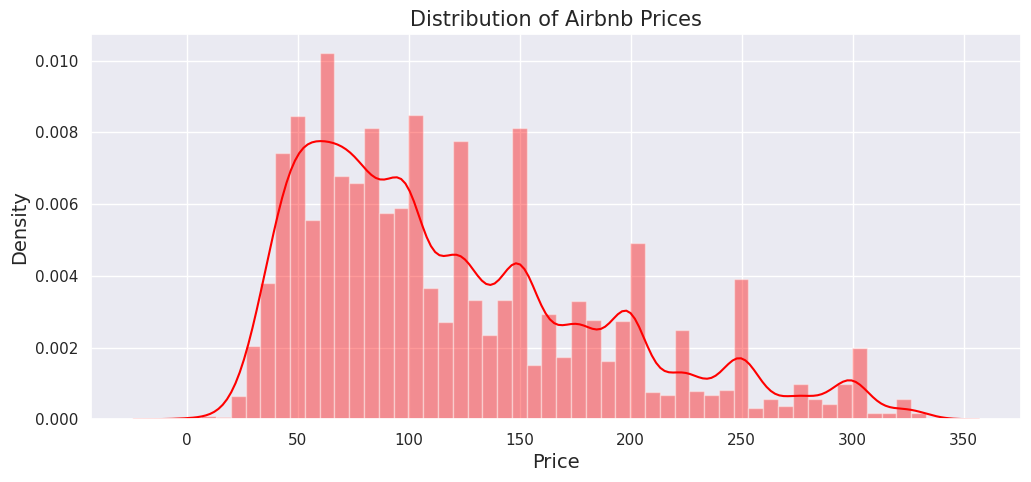

In [24]:
plt.figure(figsize=(12, 5))

sns.set_theme(style='darkgrid')

sns.distplot(df['price'],color=('red'))

plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.title('Distribution of Airbnb Prices',fontsize=15)

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
fig = px.histogram(df, x='price')

fig

(2)Total Listing/Property count in Each Neighborhood Group using Catplot

In [27]:
counts = df['neighbourhood_group'].value_counts()

top_Neighborhood_group = counts.reset_index()

top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

top_Neighborhood_group

Neighborhood_Groups  Listing_Counts
0           Manhattan           19501
1            Brooklyn           19415
2              Queens            5567
3               Bronx            1070
4       Staten Island             365

Text(-11.430555555555548, 0.5, 'Total listings counts')

<Figure size 1200x800 with 0 Axes>

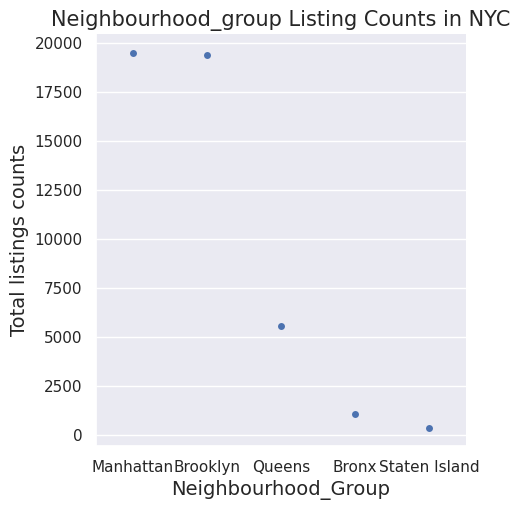

In [28]:
plt.figure(figsize=(12, 8))

sns.catplot(data=top_Neighborhood_group, x = 'Neighborhood_Groups', y = 'Listing_Counts')

plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)

plt.xlabel('Neighbourhood_Group', fontsize=14)

plt.ylabel('Total listings counts', fontsize=14)

In [29]:
fig = px.scatter(top_Neighborhood_group, x='Neighborhood_Groups', y='Listing_Counts', title='Top Neighborhood Groups')

fig.show()

(3) Price Distribution Of Each Neighborhood Group using Violin Plot

In [30]:
numeric_columns = df.select_dtypes(include=['number'])
grouped = df.groupby(["neighbourhood_group"])[numeric_columns.columns].mean()

neighbourhood_group_avg_price = grouped.reset_index()

neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)

neighbourhood_group_avg_price[['neighbourhood_group', 'avg_price']].head()

neighbourhood_group  avg_price
0               Bronx      77.37
1            Brooklyn     105.70
2           Manhattan     145.90
3              Queens      88.90
4       Staten Island      89.24

In [31]:
fig = px.violin(data_frame=df, x='neighbourhood_group', y = 'price', color='neighbourhood_group')

fig

(4) Average Minimum Price In Neighborhoods using Scatter chart

In [32]:
neighbourhood_avg_price = df.groupby("neighbourhood")[numeric_columns.columns].mean().reset_index().rename(columns={"price": "avg_price"})[['neighbourhood', 'avg_price']]

neighbourhood_avg_price = neighbourhood_avg_price.sort_values("avg_price").head(10)

neighbourhood_avg_price_sorted_with_group = neighbourhood_avg_price.join(df[['neighbourhood', 'neighbourhood_group']].drop_duplicates().set_index('neighbourhood'),
                                                                         on='neighbourhood')

neighbourhood_avg_price_sorted_with_group

neighbourhood  avg_price neighbourhood_group
27      Bull's Head  47.333333       Staten Island
101     Hunts Point  50.500000               Bronx
195         Tremont  51.545455               Bronx
178       Soundview  53.466667               Bronx
50           Corona  54.412698              Queens
140        New Dorp  57.000000       Staten Island
24        Bronxdale  57.105263               Bronx
141  New Dorp Beach  57.400000       Staten Island
87       Grant City  57.666667       Staten Island
46          Concord  58.192308       Staten Island

<Axes: title={'center': 'Average Airbnb Price by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

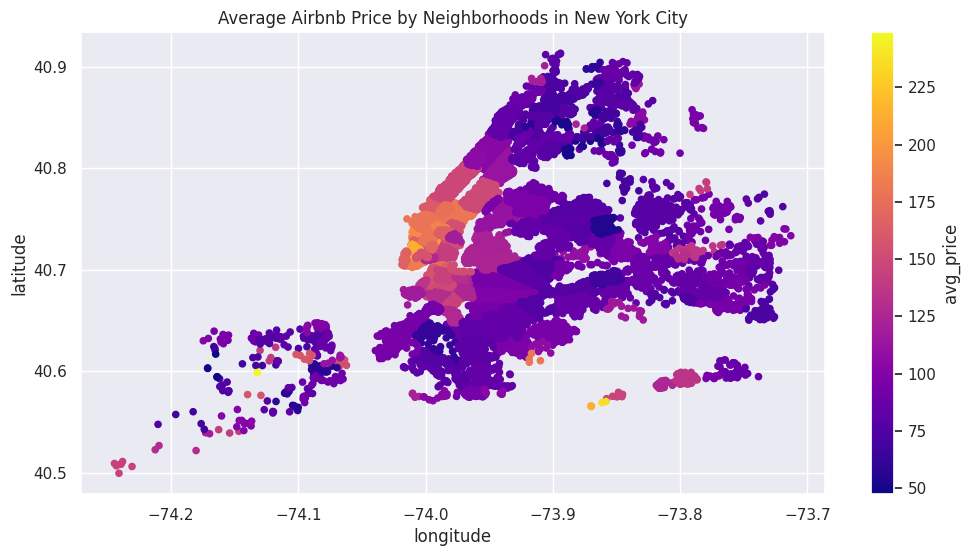

In [33]:
neighbourhood_avg_price = (df.groupby("neighbourhood")[numeric_columns.columns].mean().reset_index().rename(columns={"price": "avg_price"}))[['neighbourhood', 'avg_price']]
neighbourhood_avg_price = (neighbourhood_avg_price.sort_values("avg_price"))

neighbourhood_avg_price = df.groupby("neighbourhood")["price"].mean()

neighbourhood_prices = pd.DataFrame({"neighbourhood": neighbourhood_avg_price.index, "avg_price": neighbourhood_avg_price.values})

df = df.merge(neighbourhood_prices, on="neighbourhood")

fig = df.plot.scatter(x="longitude", y="latitude", c="avg_price", title="Average Airbnb Price by Neighborhoods in New York City", figsize=(12,6), cmap="plasma")
fig

In [34]:
px.scatter(df, x='longitude', y='latitude', color='avg_price')

(5) Number of listings of each room type in the Airbnb NYC dataset

In [35]:
top_room_type = df['room_type'].value_counts().reset_index()

top_room_type.columns = ['Room_Type', 'Total_counts']

top_room_type

Room_Type  Total_counts
0  Entire home/apt         22784
1     Private room         21996
2      Shared room          1138

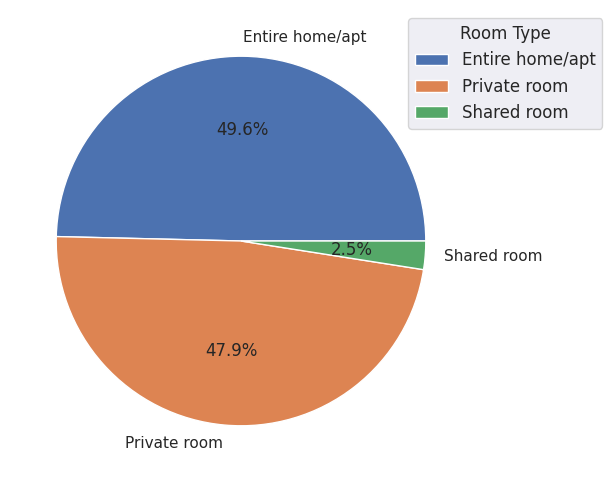

In [36]:
plt.figure(figsize=(10, 6))

room_type_counts = df['room_type'].value_counts()

labels = room_type_counts.index
sizes = room_type_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.legend(title='Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize='12')

plt.show()


(6) Using latitude and longitude in scatterplot map and finding neighbourhood_groups and room types in map

Text(0.5, 1.0, 'Location Co-ordinates')

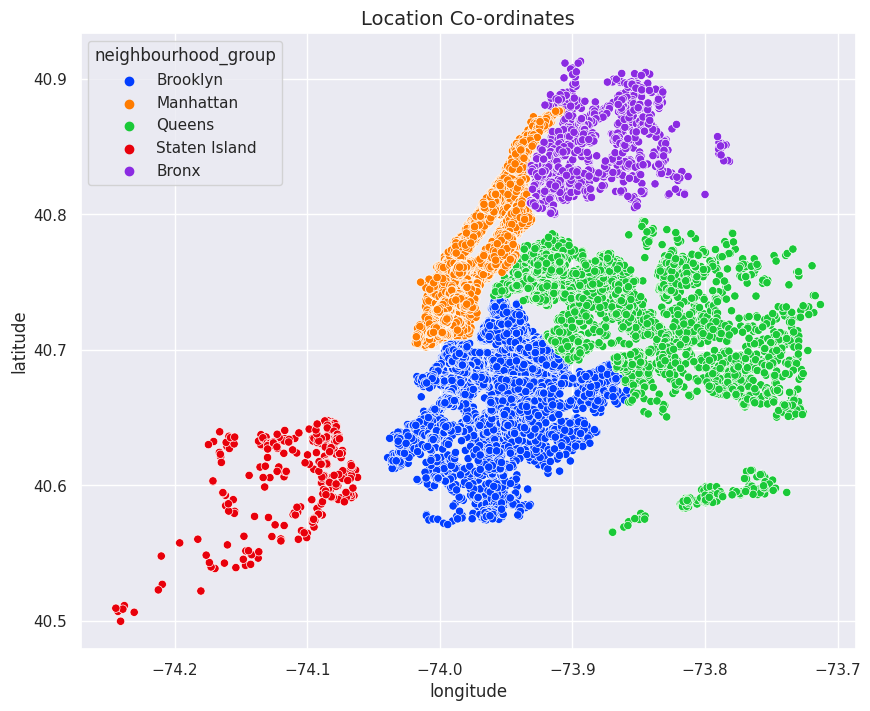

In [37]:
sns.set(rc={"figure.figsize": (10, 8)})

ax = sns.scatterplot(data=df, x="longitude", y="latitude", hue='neighbourhood_group', palette='bright')

ax.set_title('Location Co-ordinates', fontsize='14')

In [38]:
px.scatter(df, x = 'longitude', y = 'latitude', color = 'neighbourhood_group')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

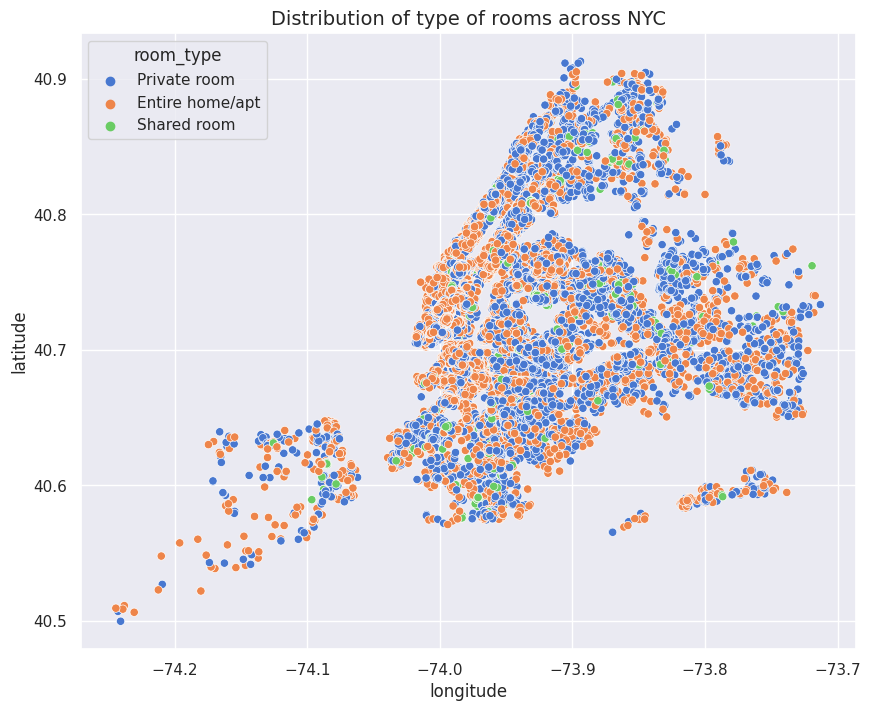

In [39]:
sns.set(rc={"figure.figsize": (10, 8)})

ax = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette='muted')

ax.set_title('Distribution of type of rooms across NYC', fontsize='14')

(7) Price variations in NYC Neighbourhood groups using scatter plot

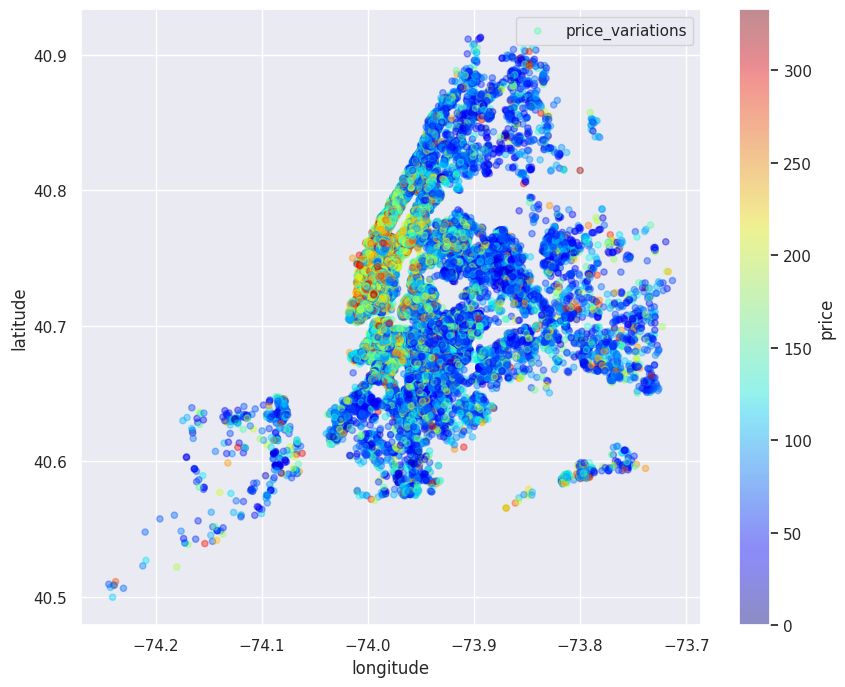

In [40]:
lat_long = df.plot(kind='scatter', x='longitude', y='latitude', label='price_variations', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))

lat_long.legend()

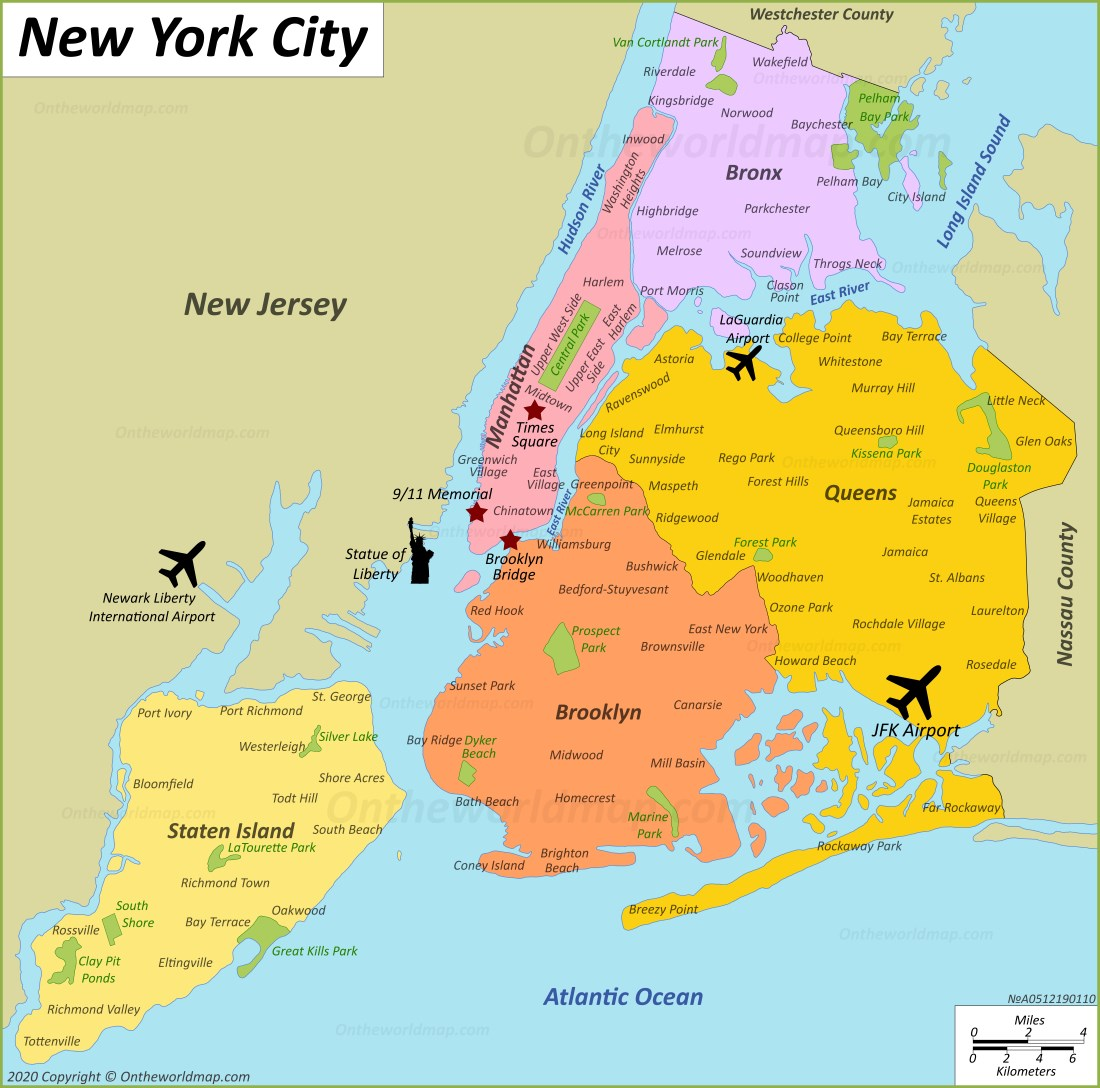